# <span id="0">Casus *Hidden Markov Model* - Deel I</span>

Inhoud:

* **<a href="#1">CpG-islands (CGIs)</a>**

* **<a href="#2">Hidden Markov Models</a>**

* **<a href="#3">CpG-eiland en non-CpG-eiland sequenties</a>**

* **<a href="#4">Toy-data</a>**

* **<a href="#5">Je eigen `HiddenMarkovModel` class</a>**

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np

<a id="1" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-islands (CGIs)

CpG-eilandjes zijn elementen in het genoom die een grote invloed uitoefenen op de regulatie van genexpressie door DNA-methylatie. Hun rol in kankerontwikkeling door abnormale methylatie van tumorsuppressorgenen en oncogenen maakt het een doelwit voor diagnostische en therapeutische benaderingen. Begrip van de dynamiek van CpG-eilandjes biedt inzicht in de moleculaire mechanismen van kanker en mogelijkheden voor innovatieve behandelingsstrategieën.

CpG-eilandjes zijn gebieden in het DNA die een hoge dichtheid hebben aan CpG-dinucleotiden, waarbij "CpG" staat voor een cytosine nucleotide (C) gevolgd door een guanine nucleotide (G) verbonden door een fosfaatgroep (p). Deze eilanden zijn meestal ongewoon rijk aan de CG-combinatie en bevatten vaak geen gemethyleerde cytosines, wat hen onderscheidt van de rest van het genoom waar CpG dinucleotiden vaak gemethyleerd zijn en daardoor minder frequent voorkomen. CpG-eilandjes komen vaak voor in of nabij de promotorregio's van genen, die de expressie van de corresponderende genen reguleren. Ze zijn typisch een paar honderd tot een paar duizend basenparen lang en hebben een GC-gehalte van meer dan 50%, met een CpG-dichtheid hoger dan wat gemiddeld is voor het genoom.

CpG-eilandjes spelen een cruciale rol bij de regulatie van genexpressie via hun invloed op DNA-methylatie, een epigenetisch mechanisme. Dit proces voegt een methylgroep toe aan het cytosine-residu in CpG-dinucleotiden, meestal door de werking van DNA-methyltransferasen. In promotorregio's is methylatie vaak geassocieerd met gen-silencing omdat het de binding van transcriptiefactoren en andere noodzakelijke eiwitten voor genexpressie ontmoedigt. Omgekeerd kan het demethyleren van CpG-eilandjes de expressie van geassocieerde genen activeren, aangezien het de toegankelijkheid van transcriptiefactoren en RNA-polymerase vergroot.

<img src="https://media.licdn.com/dms/image/D4D22AQEdqGnu8ZC80Q/feedshare-shrink_2048_1536/0/1684682580953?e=2147483647&v=beta&t=r6jlPalFOi_YDqJ_tBSPkdZRlvfakvmH1DVf9bnTTEk" width="40%" heigth="40%" />

De epigenetische modificatie van CpG-eilandjes speelt een belangrijke rol in kankerontwikkeling door abnormale genexpressie. In kankercellen worden CpG-eilandjes in de promotorregio's van tumorsuppressorgenen vaak hypergemethyleerd. Dit leidt tot silencing van deze genen, wat bijdraagt aan ongecontroleerde celgroei en proliferatie. Voorbeelden van tumorsuppressorgenen die vaak gehypermethyleerd zijn in kanker omvatten *p16INK4a* en *BRCA1*. Globale hypomethylatie van het genoom kan ook voorkomen in kankercellen, wat resulteert in genomische instabiliteit en de activatie van oncogenen. Dit draagt bij aan tumorvorming en -progressie.

Abnormale methylatiepatronen van CpG-eilandjes kunnen dienen als biomarkers voor de vroege detectie en diagnose van kanker. Epigenetische therapieën, zoals DNA-methylatie-inhibitoren (bijv. azacitidine en decitabine), worden gebruikt om abnormale methylatie om te keren en de normale expressie van tumorsuppressorgenen te herstellen.

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/CpG_site) pagina door.

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/bc3wtVXyAXo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# UITWERKING

- CpG-eilanden zijn DNA-regio's met een hoge concentratie van cytosine (C) en guanine (G) nucleotiden en hun rol in genexpressie, 
X-chromosoom-inactivatie en kanker. 

### Belangrijke punten:  

1. **CpG-plaatsen en mutaties:**  
   - CpG-plaatsen ontstaan wanneer cytosines direct gevolgd worden door guanines in een 5'-naar-3'-richting.  
   - In menselijke genomen verwacht men dat 6,25% van de DNA-sequenties CpG-plaatsen zijn, maar in werkelijkheid is dit slechts 1%, 
   door mutaties veroorzaakt door enzymatische processen.  
   - **Uracil DNA glycosylase** herkent en verwijdert uracil (U) die ontstaat door deaminatie van ongemethyleerde cytosines.  
   - Bij gemethyleerde cytosines, die worden omgezet in thymine (T), kan herstel alleen plaatsvinden via mismatchreparatie, een inefficiënt proces.
   **Thymine DNA glycosylase (TDG)** vervangt thymine bij T-G mismatches, maar dit is vaak niet snel genoeg om mutaties te voorkomen.  

2. **CpG-eilanden:**  
   - CpG-eilanden zijn DNA-regio’s van minimaal 200 basenparen, met een GC-gehalte van meer dan 50% en een 
   CpG-verhouding van meer dan 60% van het verwachte aantal.  
   - Deze eilanden zijn meestal ongemethyleerd en worden vaak gevonden bij promoters van actieve genen, zoals housekeeping-genen. 
   Ongeveer 70% van de menselijke promoters bevinden zich in CpG-eilanden.  

3. **Methylatie en ontwikkeling:**  
   - Tijdens de vroege embryonale ontwikkeling (blastocyststadium) blijven promoters van actieve genen ongemethyleerd ondanks de 
   golven van **de novo methylatie** die door **DNA methyltransferases** worden uitgevoerd.  
   - Bij vrouwelijke zoogdieren wordt één van de twee X-chromosomen geïnactiveerd door methylatie van CpG-eilanden, waardoor
   genexpressie van dat chromosoom wordt gestopt.  

4. **Rol in kanker:**  
   - Hyper-methylatie van CpG-eilanden in promoters komt 10 keer vaker voor dan mutaties en kan leiden tot genstillegging.  
   - Stilgelegde DNA-reparatiegenen door hyper-methylatie verhogen het risico op kanker aanzienlijk. Veel van deze methylatieverschillen
   komen voor bij **CpG-eilandkusten**, gebieden net buiten de CpG-eilanden zelf.  

5. **CpG-eilanden als promoters:**  
   - Door hun hoge GC-gehalte en ongemethyleerde toestand binden transcriptiefactoren makkelijker aan CpG-eilanden.  
   - Deze eilanden hebben unieke chromatinestructuren met hoge niveaus van H3- en H4-histon-acetylatie, kenmerkend voor transcriptioneel actieve chromatine.  



# <a id="2" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Hidden Markov Models

CpG-eilandjes kunnen worden gedetecteerd met behulp van verschillende computationele methoden, waarvan een van de meest effectieve methoden het gebruik van Hidden Markov Models (HMMs) is.

Een Hidden Markov Model is een krachtig hulpmiddel voor het modelleren van tijdreeksen en sequentiële data waarin de werkelijke toestanden niet direct zichtbaar zijn, maar waar de uitkomsten afhankelijk zijn van deze toestanden. HMMs maken gebruik van probabilistische berekeningen om te schatten welke verborgen toestanden het meest waarschijnlijk zijn gegeven de waargenomen data, wat ze tot een waardevol instrument maakt in een breed scala aan toepassingen. HMMs worden breed toegepast in verschillende domeinen van de bioinformatica, maar ook bijvoorbeeld in spraakherkenning en natuurlijke taalverwerking of financiële modellering van markttendensen.

Hidden Markov Models zijn zeer geschikt voor de detectie van CpG-eilandjes vanwege hun vermogen om sequenties te modelleren en patronen te herkennen in biologische data. In het kader van CpG-eilandjes vormen de verschillende nucleotiden in het DNA de waargenomen data, en is de aanwezigheid van een CpG-eiland, al dan niet, de verborgen toestand. Door het toepassen van HMMs kunnen wetenschappers efficiënt de locatie van CpG-eilandjes bepalen, wat waardevolle inzichten biedt in genregulatie en kankeronderzoek.

<img src="https://www.researchgate.net/profile/Tomer-Toledo/publication/245563174/figure/fig1/AS:669081116094471@1536532777801/State-transition-diagram-of-a-hidden-Markov-model.png" width="40%" height="40%" />

Een HMM wordt gekarakteriseerd door de volgende eigenschappen:

* **Toestanden / States** Een gegeven aantal verschillende verborgen interne toestanden waarin een geobserveerd systeem zich kan bevinden. In de context van CpG-eilandjesdetectie kunnen de toestanden bijvoorbeeld "in een CpG-eiland" en "buiten een CpG-eiland" zijn.

* **Overgangswaarschijnlijkheden / Transition probabilities** De kans dat het systeem van de ene toestand naar de andere overgaat. Bijvoorbeeld, de kansen om van "buiten een CpG-eiland" naar "in een CpG-eiland" te veranderen, en omgekeerd, of de kansen om binnen dezelfde toestand te blijven.

* **Emissiekansen / Emission probabilities** De kans om een bepaalde uitkomst te observeren vanuit een gegeven toestand. Voor CpG-eilandjes zijn dit de kansen van het voorkomen van verschillende nucleotiden (A, T, C, G) zowel in als buiten de eilandjes.

* **Begintoestandsverdeling / Start probabilities** De initiële waarschijnlijkheden dat het systeem dat zich in een bepaalde toestand bevindt. Een DNA-sequentie kan met zekere kans beginnen met een CpG-eilandje, of niet.

Een HMM maakt, net als elk model, diverse aannamen die de analyse van gegevens vereenvoudigen. De belangrijkste aannamen van een HMM zijn dat (1) het waargenomen systeem zich alléén in een discreet (d.w.z. eindig) aantal verschillende toestanden kan bevinden die variëren in de loop van de reeks, (2) dat de waarnemingen die aan het systeem gedaan worden alléén afhangen van de huidige toestand van het systeem, en (3) dat de kansverdeling omtrent wat de toestand van het systeem op een volgend moment gaat zijn alléén afhangt van wat de toestand van het systeem op een voorgaand moment was.

De toestand van het systeem is zelf niet rechtstreeks waarneembaar; wel waarneembaar zijn de emissies die afhangen van de toestand. De meestgestelde vraag die een HMM kan proberen te beantwoorden is: "gegeven een serie waarnemingen, wat waren de meest waarschijnlijke onderliggende toestanden van het systeem"? Bijvoorbeeld, in ons geval: "gegeven een nucleotidesequentie, welke delen vallen in een CpG-eiland en welke vallen erbuiten"?

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/Hidden_Markov_model) pagina door.

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/fX5bYmnHqqE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# UITWERKING

#### Example Scenario

Imagine you're taking a university course, and your professor has one of two moods each day: **happy** or **sad**. The professor's mood on any given day depends only on their mood on the **previous day** (the Markov property).

There are two types of probabilities that describe the model's behavior:

1. **Transition Probabilities**:  
   If the professor is happy on day \( t-1 \):
   $$
   P(\text{happy on day } t \mid \text{happy on day } t-1) = 0.7
   $$
   $$
   P(\text{sad on day } t \mid \text{happy on day } t-1) = 0.3
   $$

   If the professor is sad on day \( t-1 \):
   $$
   P(\text{happy on day } t \mid \text{sad on day } t-1) = 0.5
   $$
   $$
   P(\text{sad on day } t \mid \text{sad on day } t-1) = 0.5
   $$

2. **Emission Probabilities**:  
   The professor wears a shirt in one of three colors: red, green, or blue. The probability of wearing a specific color depends on their mood:
   - **Happy:**
     $$
     P(\text{red} \mid \text{happy}) = 0.8, \quad P(\text{green} \mid \text{happy}) = 0.1, \quad P(\text{blue} \mid \text{happy}) = 0.1
     $$

   - **Sad:**
     $$
     P(\text{red} \mid \text{sad}) = 0.2, \quad P(\text{green} \mid \text{sad}) = 0.3, \quad P(\text{blue} \mid \text{sad}) = 0.5
     $$

---

#### Observations and Hidden States

- **Hidden states**: The professor's mood: happy/sad
- **Observed states**: The shirt color: red/green/blue

---

#### Problem Statement

After three days, you observe the shirt colors:
- Day 1: green
- Day 2: blue
- Day 3: red

**Question**: What are the most likely moods of the professor on these days, based on the transition and emission probabilities?

---

#### Model Calculations

The solution involves **maximizing** the joint probability of:
1. The observed states (shirt colors).
2. The hidden states (moods).

##### Simplifying with Assumptions

1. **Markov Property**:  
   $$
   P(\text{Mood}_t \mid \text{Mood}_{t-1}, \dots, \text{Mood}_0) = P(\text{Mood}_t \mid \text{Mood}_{t-1})
   $$

2. **Independent Emissions**:  
   $$
   P(\text{Shirt Color}_t \mid \text{Mood}_t, \dots, \text{Mood}_0) = P(\text{Shirt Color}_t \mid \text{Mood}_t)
   $$

These assumptions simplify the complex joint probability into a product of terms that can be calculated separately:

- **Transition probabilities**:  
  $$
  P(\text{happy on day } 2 \mid \text{happy on day } 1) = 0.7
  $$

- **Emission probabilities**:  
  $$
  P(\text{green shirt} \mid \text{happy}) = 0.1
  $$

By computing all possible mood combinations (\( 2^3 = 8 \)), we identify the sequence of moods that maximizes the probability of the observations.
- Transition probabilities tell you how likely it is for the professor to move from one mood to another.
- Emission probabilities tell you how likely it is for the professor to wear a specific shirt color given their mood.
- The joint probability combines these factors to help predict the most likely sequence of hidden states (moods) given the observations (shirt colors).

---

#### Applications of HMM

1. **Natural Language Processing**:  
   - Example: Assigning parts of speech (e.g., verb or noun) to words in a sentence.  
   - Observed states: words.  
   - Hidden states: grammatical categories.

2. **Speech Recognition**:  
   - HMM is used to map spoken words to hidden phonemes.



<a id="3" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-eiland en non-CpG-eiland sequenties

De onderstaande tabellen geven de experimentele waarschijnlijkheden aan dat een zekere nucleotide (in de rijen) gevolg wordt door een zekere andere nucleotide (in de kolommen) binnen en buiten CpG-eilanden.

Bron: "Biological sequence analysis - Probabilistic models of proteins and nucleic acids", Durbin et al. (1998), hoofdstuk 3, p50-51 ([ref](http://www.mcb111.org/w06/durbin_book.pdf)).

*CGI* (`+`)

|  `+`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.180 | 0.274 | 0.426 | 0.120 |
| **C** | 0.171 | 0.368 | 0.274 | 0.188 |
| **T** | 0.161 | 0.339 | 0.375 | 0.125 |
| **G** | 0.079 | 0.355 | 0.384 | 0.182 |

*non-CGI* (`-`)

|  `-`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.300 | 0.205 | 0.285 | 0.210 |
| **C** | 0.322 | 0.298 | 0.078 | 0.302 |
| **G** | 0.248 | 0.246 | 0.298 | 0.208 |
| **T** | 0.177 | 0.239 | 0.292 | 0.292 |

Bijvoorbeeld, de kans dat een gegeven C gevolgd wordt door een G is slechts 7.8 % buiten een CpG-eilandje, maar neemt toe tot maar liefst 27.4 % binnen een CpG-eilandje, hetgeen benadrukt hoe sterk CpG-dinucleotiden relatief oververtegenwoordigd zijn binnen CpG-eilandjes. Ga na dat de som van de kansen in elke rij van de tabel moet sommeren tot 100% (op afrondfouten na).

Genereer met python-code een willekeurige sequentie van 300 baseparen lengte overeenkomend met een CpG-eiland en een soortgelijke sequentie van een non-CpG-eiland. Kies telkens het eerste nucleotide willekeurig, en gebruik dan de bovenstaande overgangswaarschijnlijkheden om de sequentie te verlengen. Bepaal van de gegenereerde complete sequenties de kansen op elk nucleotide ($P_A, P_C, P_G, P_T$) evenals de kansen op elk dinucleotide ($P_{AA}, P_{AC}, \ldots, P_{TT}$). Bepaal voor elk dinucleotide ook de ratios $r$ tussen de waargenomen en de verwachte kans, zoals

$$
r_{AC} = \frac{P_{AC}}{P_A \cdot P_C}
$$

Wat kun je verhoudingsgewijs zeggen over hoe vaak C en G afzonderlijk voorkomen, en hoe vaak het CpG-dinucleotide voorkomt? Welke combinaties van nucleotiden zijn het sterkst over- of ondergerepresenteerd?

In [9]:
#### UITWERKING
import random
import numpy as np

# Transition probabilities for CpG and non-CpG islands
transitions = {
    "CGI+": {  # Transition matrix for CpG islands
        'A': [0.180, 0.274, 0.426, 0.120],  # Probabilities of moving to A, C, G, T from A
        'C': [0.171, 0.368, 0.274, 0.188],  # Probabilities of moving to A, C, G, T from C
        'G': [0.079, 0.355, 0.384, 0.182],  # Probabilities of moving to A, C, G, T from G
        'T': [0.161, 0.339, 0.375, 0.125]   # Probabilities of moving to A, C, G, T from T
    },
    "CGI-": {  # Transition matrix for non-CpG islands
        'A': [0.300, 0.205, 0.285, 0.210],
        'C': [0.322, 0.298, 0.078, 0.302],
        'G': [0.248, 0.246, 0.298, 0.208],
        'T': [0.177, 0.239, 0.292, 0.292]
    }
}

# List of all nucleotide types
nucleotides = ['A', 'C', 'G', 'T']


def generate_sequence(length, transition_matrix):
    """
    Generate a random nucleotide sequence using a given transition probability matrix.

    Parameters:
        length (int): The length of the sequence to generate.
        transition_matrix (dict): A dictionary containing transition probabilities for each nucleotide.

    Returns:
        str: A string representing the generated nucleotide sequence.
    """
    # Start the sequence with a random nucleotide
    sequence = [random.choice(nucleotides)]
    
    # Loop to generate the rest of the sequence
    for _ in range(length - 1):
        # Use the last nucleotide in the sequence to determine the next nucleotide
        # 'random.choices' picks a nucleotide based on the probabilities from the transition matrix
        sequence.append(random.choices(nucleotides, transition_matrix[sequence[-1]])[0])
    
    # Convert the list of nucleotides to a string
    return ''.join(sequence)


def calculate_probs(sequence):
    """
    Calculate the probabilities of individual nucleotides and dinucleotides in a given sequence.

    Parameters:
        sequence (str): The nucleotide sequence.

    Returns:
        tuple: A tuple containing:
            - nucleotide_probs (dict): Probabilities of each nucleotide (A, C, G, T).
            - dinucleotide_probs (dict): Probabilities of each dinucleotide (e.g., AA, AC, ...).
    """
    n = len(sequence)  # Total number of nucleotides in the sequence

    # Calculate single nucleotide probabilities
    nucleotide_probs = {nt: sequence.count(nt) / n for nt in nucleotides}
    
    # Calculate dinucleotide probabilities
    dinucleotide_probs = {
        nt1 + nt2: sequence.count(nt1 + nt2) / (n - 1)  # Number of dinucleotides divided by possible positions
        for nt1 in nucleotides for nt2 in nucleotides
    }

    return nucleotide_probs, dinucleotide_probs


def calculate_ratios(nucleotide_probs, dinucleotide_probs):
    """
    Calculate the observed/expected ratio for each dinucleotide.

    Parameters:
        nucleotide_probs (dict): Probabilities of individual nucleotides.
        dinucleotide_probs (dict): Probabilities of dinucleotides.

    Returns:
        dict: A dictionary with dinucleotides as keys and their observed/expected ratios as values.
    """
    return {
        dinuc: dinucleotide_probs[dinuc] / (nucleotide_probs[dinuc[0]] * nucleotide_probs[dinuc[1]])
        if nucleotide_probs[dinuc[0]] * nucleotide_probs[dinuc[1]] > 0 else 0  # Avoid division by zero
        for dinuc in dinucleotide_probs
    }


def format_output(label, sequence, nucleotide_probs, dinucleotide_probs, ratios):
    """
    Print the sequence and calculated probabilities in a readable format.

    Parameters:
        label (str): Label for the current dataset (e.g., CGI+ or CGI-).
        sequence (str): The nucleotide sequence.
        nucleotide_probs (dict): Probabilities of individual nucleotides.
        dinucleotide_probs (dict): Probabilities of dinucleotides.
        ratios (dict): Observed/expected ratios for each dinucleotide.

    Returns:
        None
    """
    # Print header for the output
    print(f"=================================={label}==================================\n")
    
    # Print the generated sequence
    print(f"Sequence:\n{sequence}\n")
    
    # Print probabilities of single nucleotides
    print(f"Observed nucleotides (A, C, G, T):")
    print([round(nucleotide_probs[nt], 3) for nt in nucleotides])
    
    # Print probabilities of dinucleotides in a grid format
    print("\nObserved dinucleotides:")
    print(np.round(np.array([[dinucleotide_probs[nt1 + nt2] for nt2 in nucleotides] for nt1 in nucleotides]), 3))
    
    # Print observed/expected ratios in a grid format
    print("\nObserved/Expected ratio:")
    print(np.round(np.array([[ratios[nt1 + nt2] for nt2 in nucleotides] for nt1 in nucleotides]), 3))
    print("\n")


# Main logic to process both CGI+ and CGI- datasets
for label, matrix in transitions.items():
    # Generate a sequence of 300 nucleotides based on the transition matrix
    sequence = generate_sequence(300, matrix)
    
    # Calculate single and dinucleotide probabilities for the sequence
    nucleotide_probs, dinucleotide_probs = calculate_probs(sequence)
    
    # Calculate observed/expected ratios for dinucleotides
    ratios = calculate_ratios(nucleotide_probs, dinucleotide_probs)
    
    # Format and display the results
    format_output(label, sequence, nucleotide_probs, dinucleotide_probs, ratios)


==================================CGI+==================================

Sequence:
TCGCACACCCCCGGGGGCCTGCGGCCGGTGCGGTGGTCAGCCCGGGGGAGTCGGTGCCGGGATCTCGCCCGGTCAACTGAACTGGGGCGCCCGCACCTCCGGTCTCTTAAATATATGGATGCAGTCTCGCCCTGTGTCCCCGGCTCTTGGGTGGCTGCCCTGGCCCGGTCCCTGAGAGGGCGCCAAGCAGTGCTGCTCCGGTGGGATAAGCGGTGCTACGGCAACTCAGCAGCACAGCGTCCGGGGCTGGCGCCAATTGGGCCCGTCAGACGTGGGGGGGCACCCTGGTCCCGGCTGTCT

Observed nucleotides (A, C, G, T):
[0.123, 0.333, 0.367, 0.177]

Observed dinucleotides:
[[0.023 0.033 0.04  0.023]
 [0.054 0.077 0.087 0.074]
 [0.027 0.114 0.114 0.067]
 [0.017 0.067 0.08  0.01 ]]

Observed/Expected ratio:
[[1.539 0.814 0.887 1.074]
 [1.302 0.692 0.711 1.249]
 [0.592 0.93  0.846 1.033]
 [0.767 1.136 1.239 0.321]]


==================================CGI-==================================

Sequence:
TCAGGCACTACCTCTTAGAGCTCAATCATTGCTCCCTCCCAAACAAAATGGCCTAATCAATCGTGGCTCAGTTGAACTTTCCTCACTAGCCTCGCCAACCTCATTGTCTCTCAGAAGCATGGGCTAGACCAGGACTTAAAATGTACCAAAGCAGTGGGGGCAAAGCTGACACTGATGAACAGGAGCCGGATTGCC

INTERPRETATIE:
In CpG-eilanden (CGI+) komen C en G aanzienlijk vaker voor dan in non-CpG-eilanden (CGI-), 
waar C en G minder frequent zijn. Het CpG-dinucleotide is sterk overrepresented in CGI+ en sterk underrepresented in CGI-. 
Binnen CGI+ zijn C->C en T->G de meest overrepresented combinaties, terwijl T->T in beide gevallen het minst voorkomt. 
Dit bevestigt de verhoogde GC-content en het belang van CpG-dinucleotiden binnen CpG-eilanden.

<a id="4" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Toy-data

Gegeven zijn drie tafels (overeenkomend met toestanden) die elk een grabbelton bevatten waaruit gekleurde knikkers kunnen worden getrokken (emissies) en met elk een dobbelsteen die bepaalt naar welke volgende tafel je gaat (overgangswaarschijnlijkheden).

| Tafel: |  ❶  |  ❷  |  ❸  |
| -----: | :-: | :-: | :-: |
| **Grabbelton:** | 6x blauw | 2x blauw | 1x blauw |
|                 | 3x geel  | 6x geel  | 0x geel  | 
|                 | 1x groen | 2x groen | 6x groen |
|                 | 2x rood  | 2x rood  | 5x rood  |
| **Dobbelsteen:** | ⚀→① | ⚀→① | ⚀→① |
|                  | ⚁→② | ⚁→② | ⚁→① |
|                  | ⚂→② | ⚂→② | ⚂→① |
|                  | ⚃→② | ⚃→③ | ⚃→① |
|                  | ⚄→③ | ⚄→③ | ⚄→② |
|                  | ⚅→③ | ⚅→③ | ⚅→③ |

Beginnend bij een willekeurige tafel, trek individueel een knikker en noteer de kleur samen met het nummer van de tafel. Gebruik de dobbelsteen om te bepalen naar welke volgende tafel je gaat. Herhaal dit tot je ongeveer een dertigtal waarnemingen hebt gegenereerd en je weer precies terug bent gekomen bij de tafel waar je was begonnen.

Bijvoorbeeld:
| **Beurt:** | 1     | 2     | 3     | 4     | 5     | 6     | 7     | ... | 30    |
| ---------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :-: | :---: |
| **Tafel:** | ❷     | ❸     | ❶     | ❸     | ❷     | ❷     | ❶     | ... | ❸     |
| **Kleur:** | geel  | groen | blauw | rood  | groen | geel  | blauw | ... | rood  |
| **Worp:**  | ⚃     | ⚀     | ⚄     | ⚄     | ⚂     | ⚀     | ⚂     | ... | ⚄     |

Naast het bepalen van je eigen sequentie, combineer de waarnemingen van al je klasgenoten tot één lange sequentie.

<a id="5" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Je eigen `HiddenMarkovModel` class

Maak een eigen module-bestand genaamd `hmmmodel.py` aan en definieer daarin een klasse `HiddenMarkovModel`. Deze klasse dient een begintoestandsverdeling, overgangswaarschijnlijkheden, en emissiekansen te kunnen bevatten. De klasse dient verder een methode `sample()` te hebben die het mogelijk maakt om een gevraagd aantal waarnemingen te genereren op basis van een gegeven Hidden Markov Model. Voeg implementaties van een aantal standaard dunder-methoden toe (`__init__()`, `__str__()`, `__repr__()`).

Implementeer de functionaliteit van je eigen module zodanig dat deze grotendeels compatibel is met de `CategoricalHMM` klasse van de `hmmlearn` module waarvan je de documentatie [online](https://hmmlearn.readthedocs.io/en/latest/api.html#categoricalhmm) kan vinden. Deze module zit niet in de standaard library van python en dien je zelf wellicht nog te installeren. Merk op dat niet alle functionaliteit uit deze klasse hoeft te worden geïmplementeerd. Vooralsnog gaat het voornamelijk om initialisatie en de `sample()` methode. Later voegen we nog meer methoden aan je klasse toe.

Gebruik je eigen module om sequenties van 1200 toestanden en bijbehorende waarnemingen te genereren voor de eerdere toy-data. De tafelnummers zijn daarin de toestanden en de kleuren knikkers zijn de emissies. Dit zou moeten kunnen met code zoals hieronder.

```python
from hmmmodel import HiddenMarkovModel as HMM
model = HMM(n_components=..., n_features=...)
model.startprob_ = ...
model.transmat_ = ...
model.emissionprob_ = ...
emissions, states = model.sample(1200)
print(model)
```

Toon histogrammen van de toestanden en emissies voor al deze sequenties, en schat *op basis van de gegenereerde sequentie* de overgangswaarschijnlijkheden en emissiekansen. Ga na of deze goed overeenkomen met de instellingen van het Hidden Markov Model.

Vergelijk tenslotte of je eigen klasse soortgelijke resultaten geeft als `hmmlearn.hmm.CategoricalHMM` (d.w.z. met soortgelijke code als hierboven, maar met `from hmmlearn.hmm import CategoricalHMM as HMM`).

HiddenMarkovModel(n_components=3, n_features=4)
Start probabilities:
[0.6 0.3 0.1]
Transition matrix:
[[0.7 0.2 0.1]
 [0.3 0.5 0.2]
 [0.4 0.1 0.5]]
Emission probabilities:
[[0.4 0.3 0.2 0.1]
 [0.1 0.3 0.4 0.2]
 [0.2 0.2 0.2 0.4]]


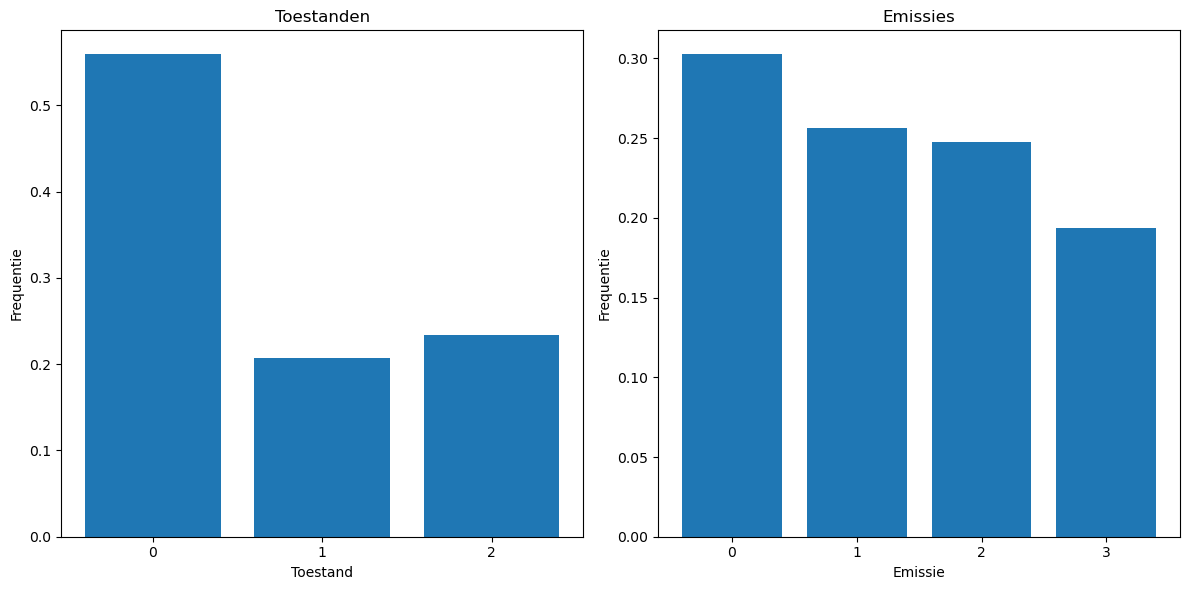

Geschatte overgangswaarschijnlijkheden:
 [[0.72 0.16 0.12]
 [0.3  0.45 0.25]
 [0.41 0.1  0.49]]
Geschatte emissiekansen:
 [[0.41 0.31 0.19 0.1 ]
 [0.12 0.22 0.44 0.22]
 [0.2  0.17 0.23 0.4 ]]


'test'

In [23]:
# UITWERKING
import numpy as np
import matplotlib.pyplot as plt
from hmmmodel import HiddenMarkovModel as HMM

# Aantal toestanden en emissies (toy-data)
n_components = 3  
n_features = 4   

# Maak een Hidden Markov Model
model = HMM(n_components=n_components, n_features=n_features)

# Stel startprobabiliteiten, transitiematrix en emissiematrix in
model.startprob_ = np.array([0.6, 0.3, 0.1]) 
model.transmat_ = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.5, 0.2],
    [0.4, 0.1, 0.5]
])
model.emissionprob_ = np.array([
    [0.4, 0.3, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.2, 0.2, 0.4]
])

# Genereer sequenties van toestanden en waarnemingen
emissions, states = model.sample(1200)

# Print model en gegenereerde data
print(model)

# Visualisatie van histogrammen
plt.figure(figsize=(12, 6))

# Histogram voor toestanden
plt.subplot(1, 2, 1)
plt.hist(states, bins=np.arange(n_components + 1) - 0.5, rwidth=0.8, density=True)
plt.xticks(range(n_components))
plt.title("Toestanden")
plt.xlabel("Toestand")
plt.ylabel("Frequentie")

# Histogram voor emissies
plt.subplot(1, 2, 2)
plt.hist(emissions, bins=np.arange(n_features + 1) - 0.5, rwidth=0.8, density=True)
plt.xticks(range(n_features))
plt.title("Emissies")
plt.xlabel("Emissie")
plt.ylabel("Frequentie")

plt.tight_layout()
plt.show()

# Schat overgangswaarschijnlijkheden en emissiekansen
estimated_transitions = np.zeros((n_components, n_components))
estimated_emissions = np.zeros((n_components, n_features))

for t in range(len(states) - 1):
    estimated_transitions[states[t], states[t + 1]] += 1
    estimated_emissions[states[t], emissions[t]] += 1
estimated_transitions /= estimated_transitions.sum(axis=1, keepdims=True)
estimated_emissions /= estimated_emissions.sum(axis=1, keepdims=True)

print("Geschatte overgangswaarschijnlijkheden:\n", np.round(estimated_transitions, 2))
print("Geschatte emissiekansen:\n", np.round(estimated_emissions, 2))

"test"

***

&copy; 2024 - Dave R.M. Langers <d.r.m.langers@pl.hanze.nl>